# Logistic Regression

**Logistic regression** is a supervised learning algorithm and machine learning technique used for **binary classification problems**, where the dependent variable is categorical (e.g., 0 or 1, or yes/no outcomes).
- Unlike linear regression, which predicts continuous values, logistic regression estimates the probability that an instance belongs to a specific class using the **logistic function**, which outputs values between 0 and 1 representing probabilities.
- If the probability exceeds a certain threshold (typically 50%), the model predicts one class; otherwise, it predicts the other.
- It can be applied to problems with one or more independent variables.

An example is predicting whether someone will purchase health insurance (yes or no) based on factors like age. The logistic regression model uses the **logistic function** (or sigmoid curve) to estimate probabilities, where the outcome ranges between 0 (no) and 1 (yes). If the probability is above 50%, the outcome is classified as yes; otherwise, it's no.


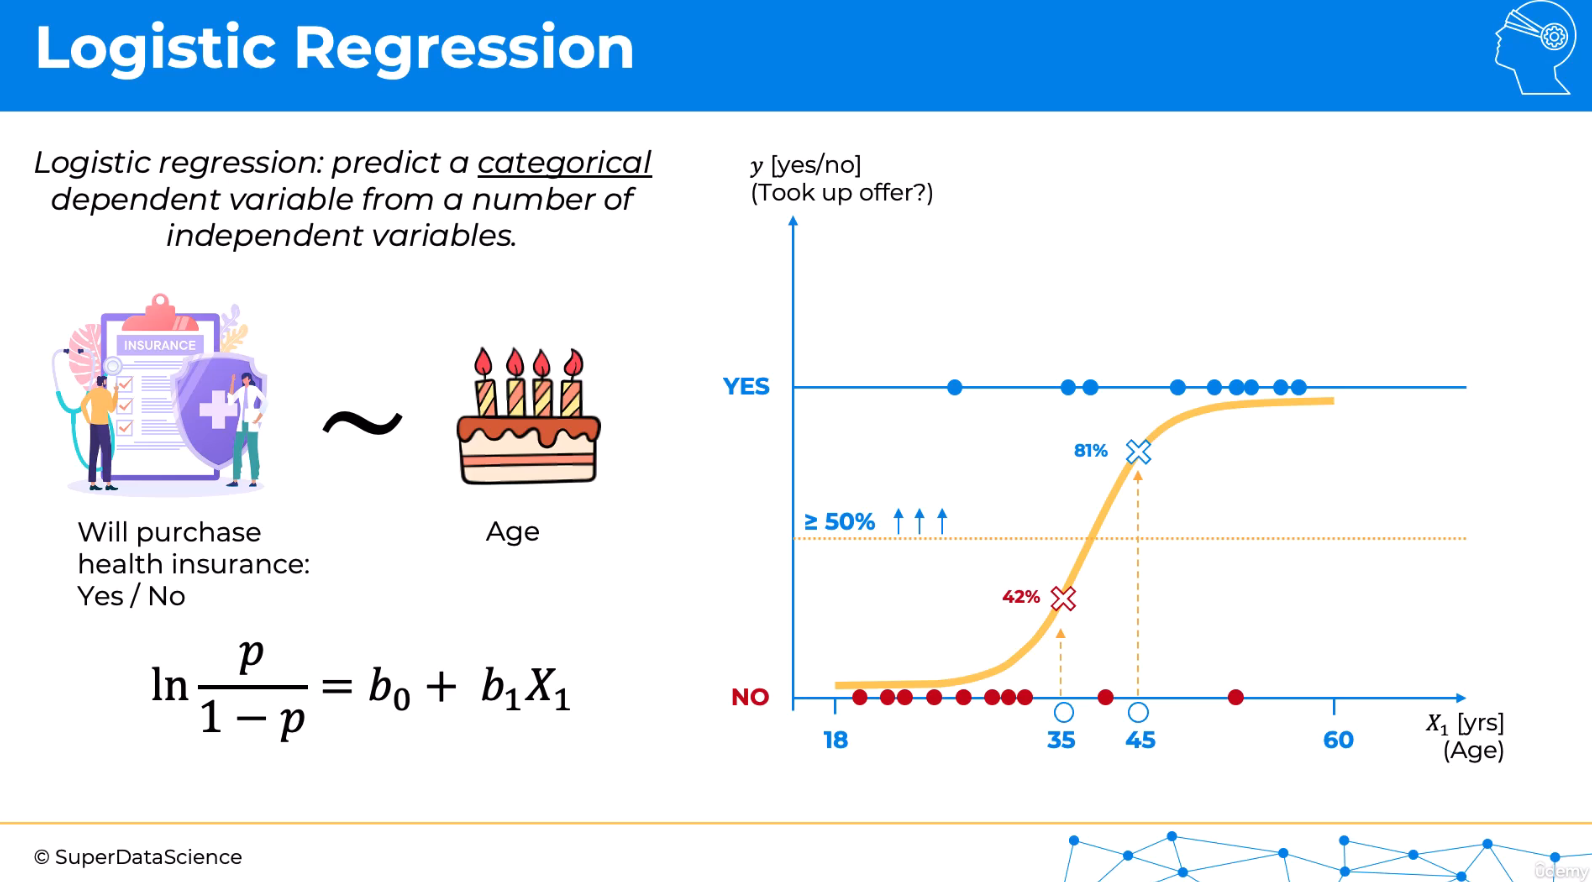

Logistic regression can handle **multiple independent variables**, such as age, income, and family size, to make predictions. The model provides probabilities for each outcome, and depending on the use case, these probabilities can either be used directly or converted into binary outcomes.

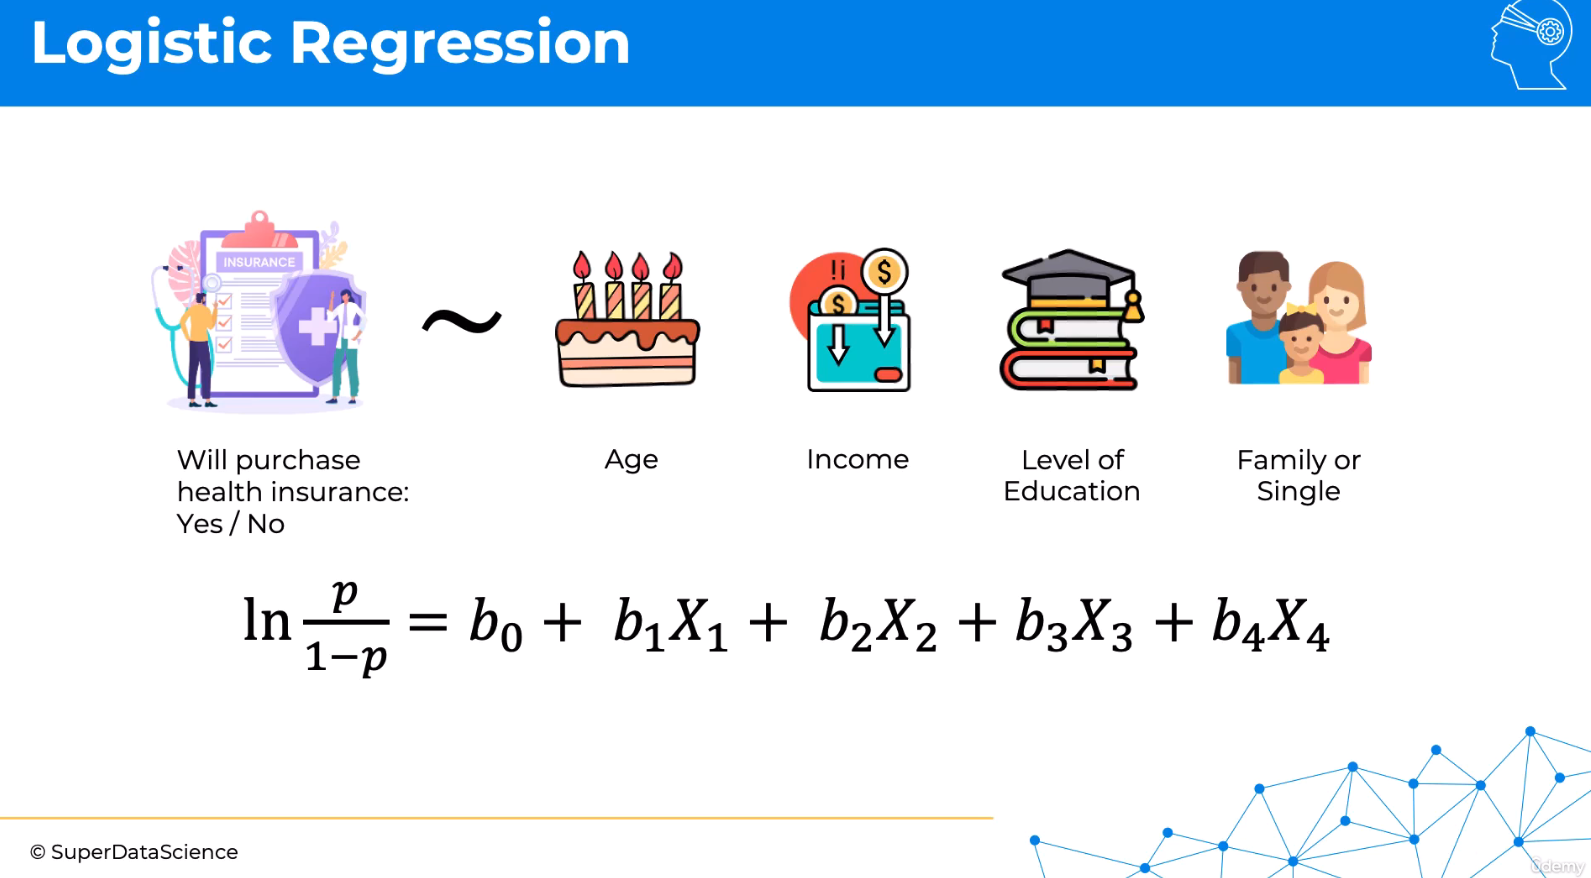

**Maximum Likelihood:** helps identify the best-fitting curve for a dataset. While multiple curves could fit the data, maximum likelihood helps determine which one is the most accurate.

The process involves:
1. Calculating the probability for each data point
2. Predicting the chances of a specific outcome (yes/no) based on the logistic regression model. For each data point, the model predicts the probability of both yes (taking the offer) and no (not taking the offer).
3. The likelihood is then calculated by multiplying the probabilities for all data points.

To find the best curve, the model compares the likelihood values for different curves and selects the one with the **highest likelihood**, indicating the best fit for the data. This iterative process ensures the optimal curve is found for logistic regression.


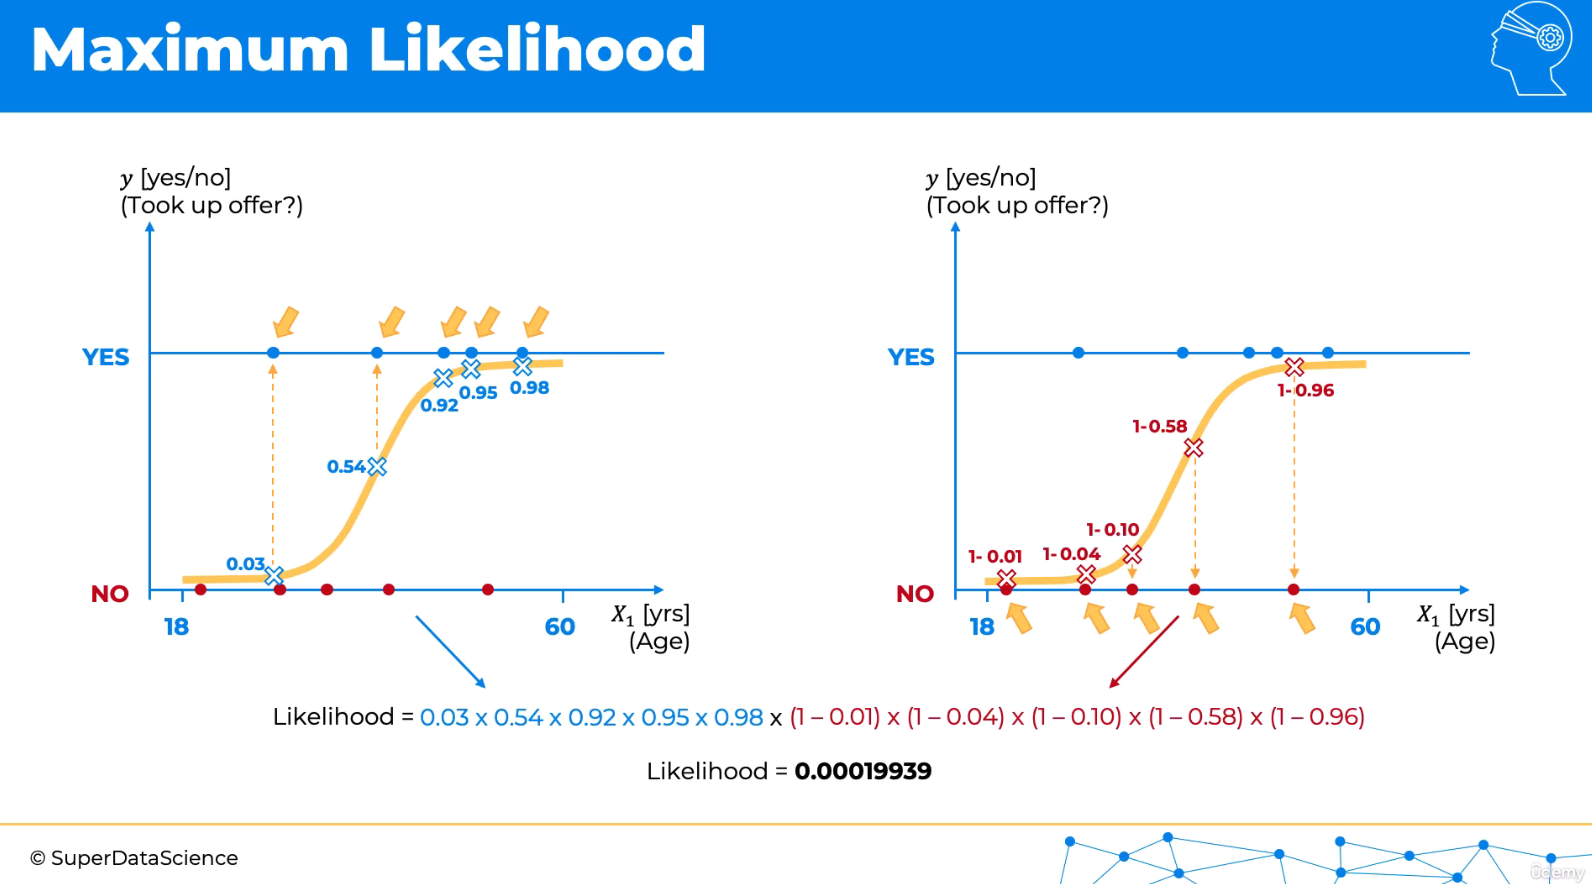

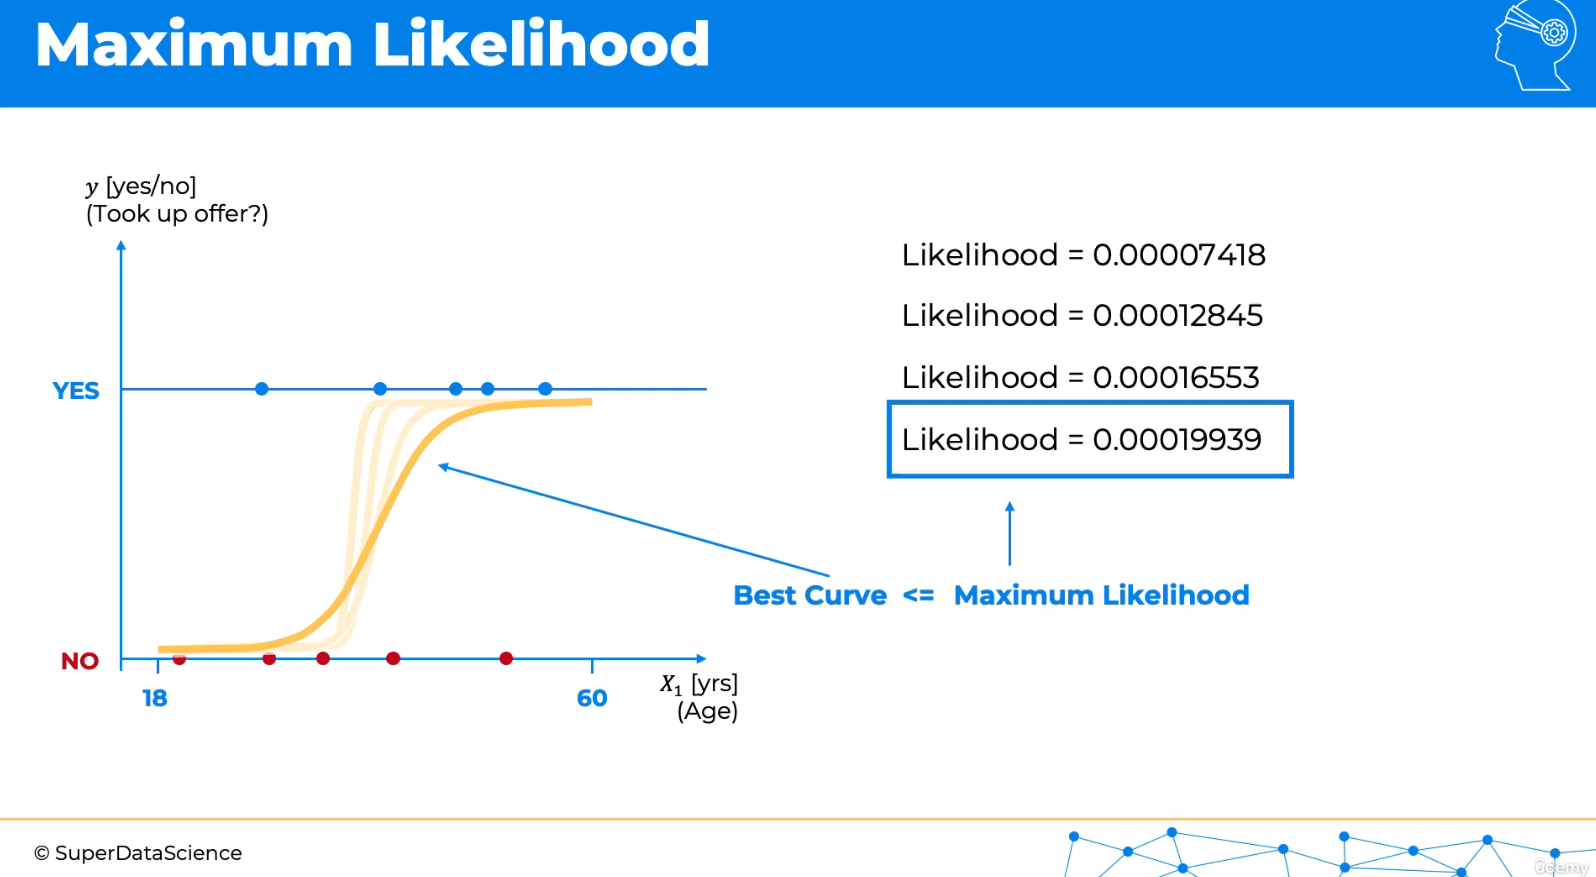

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 3 - Classification/1 Logistic Regression/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values # matrix of features
y = dataset.iloc[:, -1].values # dependent variable vector

The data set, called **Social Network Ads**, involves predicting which previous customers of a car company are likely to buy a newly released SUV. The goal is to use this data to train a classification model that can accurately predict future buyers, helping the company identify the customers with the highest conversion rates for the new vehicle.

The dataset used has only two features—**age** and **estimated salary**—to allow for easy visualization of the results in a 2D plot. Although only two features are used for this example, the implementations work for datasets with any number of features.

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split

# Split data into 75% training and 25% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [6]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [7]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [8]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

Feature scaling is a technique used to standardize the range of independent variables or features of data. The goal is to ensure that each feature contributes equally to the model's learning process, especially in algorithms that are sensitive to the scale of the features.

This time, we want to scale the age and the estimated salary.

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit the scaler to the training data and transform it (standardize features)
X_train = sc.fit_transform(X_train)

# Transform the test data using the same scaler (without fitting to avoid data leakage)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [11]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

## Training the Logistic Regression model on the Training set

In [12]:
# Import the LogisticRegression class for classification
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression classifier with a fixed random seed for reproducibility
classifier = LogisticRegression(random_state = 0)

# Train the classifier using the training data and labels
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [13]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


This line of code performs the following steps:

1. **`sc.transform([[30, 87000]])`**: Transforms the input data (`[[30, 87000]]`), which represents a new observation with age 30 and an estimated salary of 87,000, using the `StandardScaler` instance `sc`. This standardization step scales the features based on the statistics (mean and standard deviation) computed from the training data.

2. **`classifier.predict(...)`**: Uses the trained logistic regression model (`classifier`) to make a prediction on the standardized input data. The `predict` method returns the predicted class label for the input data.

3. **`print(...)`**: Outputs the prediction result to the console.


## Predicting the Test set results

In [14]:
# Predict class labels for the test set using the trained classifier
y_pred = classifier.predict(X_test)

# Concatenate the predicted labels (y_pred) and the actual labels (y_test) side by side
# Reshape both arrays to ensure they have the same number of rows
# Print the combined array to compare predictions with actual results
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [15]:
# Import metrics for evaluating classification performance
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the confusion matrix to evaluate the performance of the classifier
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix, which shows the counts of true positive, true negative, false positive, and false negative predictions
print(cm)

# Calculate and return the accuracy score, which is the proportion of correctly classified instances
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

**Confusion Matrix:**

- **True Positives (TP)**: `24` — The model correctly predicted 24 positive cases (e.g., customers who bought the SUV).
- **True Negatives (TN)**: `65` — The model correctly predicted 65 negative cases (e.g., customers who did not buy the SUV).
- **False Positives (FP)**: `3` — The model incorrectly predicted 3 cases as positive when they were actually negative.
- **False Negatives (FN)**: `8` — The model incorrectly predicted 8 cases as negative when they were actually positive.

**Accuracy Score:** `0.89`

- **Accuracy** is the proportion of correctly predicted cases out of the total number of cases. In this case, an accuracy of `0.89` (or 89%) means the model correctly classified 89% of the test instances.

**Summary**: The model performed well, with an accuracy of 89%. The confusion matrix shows that while the model had some misclassifications (3 false positives and 8 false negatives), it was generally effective at predicting both positive and negative cases.

## Visualising the Training set results

<ipython-input-16-c37a96202ffa>:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


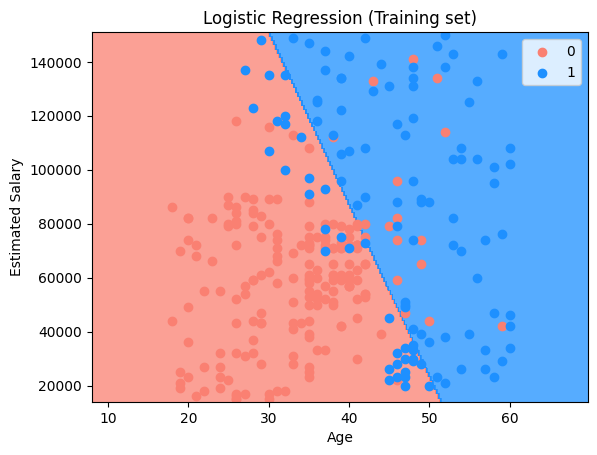

In [16]:
# Import ListedColormap for custom color maps
from matplotlib.colors import ListedColormap

# Inverse transform the features to their original scale
X_set, y_set = sc.inverse_transform(X_train), y_train

# Create a mesh grid (cuadrícula) for plotting the decision boundary
# np.meshgrid creates two 2D arrays, representing the grid, `X1` and `X2`, which cover the range of the feature values (`age` and `salary`)
# X1: range of age values
# X2: range of salary values
# np.arange create arrays with evenly spaced values within a specified range
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

# Predict the class for each point in the mesh grid and plot the decision boundary
# np.array([X1.ravel(), X2.ravel()]).T flattens the grid and transforms it into the format required for predictions
# classifier.predict(...) predicts the class for each point in the grid
# reshape(X1.shape) reshapes the predictions to match the shape of the grid
# plt.contourf(...) plots the decision boundary
# alpha = 0.75 Set transparency of the contour plot
# Use custom colors for the classes
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))

# Set x-axis limits
plt.xlim(X1.min(), X1.max())
# Set y-axis limits
plt.ylim(X2.min(), X2.max())

# Scatter plot for the training data points: Overlay the training data points on the decision boundary plot
# np.unique(y_set) gets the unique class labels.
# plt.scatter(...) plots the data points from the training set with colors corresponding to their class labels
# using `ListedColormap` for consistent color mapping and `label` to create a legend
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualization Approach:**
- Since the dataset has only two features, it can be visualized effectively in 2D. For datasets with more features, visualization is more complex and not feasible in 2D.
- The code to create this visualization is advanced and specific to 2D cases. It involves:
  - **Creating a dense grid**: A grid covering the feature ranges is created with fine intervals (e.g., every 0.25 for age and salary).
  - **Predicting values for grid points**: The logistic regression model predicts the class for each point in this grid.
  - **Plotting prediction regions**: The predicted classes are used to color the regions of the plot, showing where the model predicts each class.
  - **Scatter Plot**: Actual data points are plotted on top of the grid to show how they fit within the predicted regions.

**Notes about Code Complexity:**
- The visualization code is intricate and may not be frequently used in practical scenarios, as most real-world datasets have more than two features.
- Understanding the specific implementation details is less critical for practical machine learning work, because it may not be used anymore. But the concept of visualizing prediction regions and boundaries is valuable for interpreting model performance.


**Linear classifier and prediction curve:**

It's crucial to understand a very important concept. The prediction curve of the logistic regression model appears as a **straight line** for a specific reason: logistic regression is a linear classifier.

In fact, for any linear classifier, the prediction boundary (or curve) will always be a straight line in two dimensions. In three dimensions, this boundary becomes a flat plane.

This is a key characteristic of linear classifiers.

## Visualising the Test set results

The previous results shown are from the training set, meaning the model was trained on these customers, making it easier to achieve accurate predictions. However, the real test lies in how the logistic regression model performs on new, unseen customers in the test set.

<ipython-input-17-96b67a383660>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


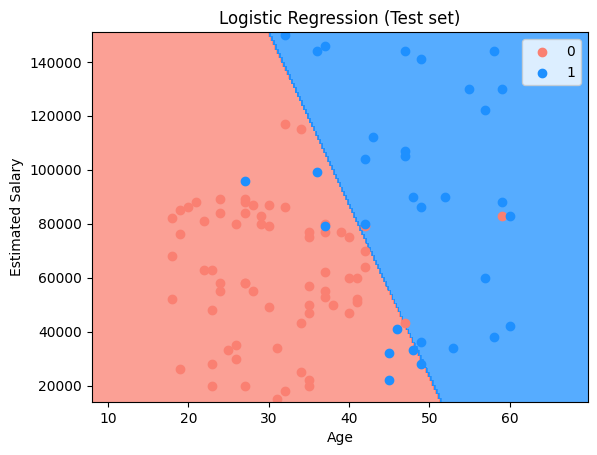

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

When visualizing the test set results, the model successfully separates the two classes—customers who bought an SUV and those who didn’t. While there are still some incorrect predictions, the model overall performs well.

To further improve accuracy and reduce errors, a more complex model with a **non-linear decision boundary** may be necessary. This type of boundary could better capture the distinctions between the classes, unlike the straight line of a linear classifier.

The next step is to explore non-linear classifiers for improved performance.

## Extra 1 - The Ultimate Guide to Regression & Classification
[This page](https://www.superdatascience.com/blogs/the-ultimate-guide-to-regression-classification) is a guide on **Regression and Classification**, published by SuperDataScience. The guide is aimed at learners advancing in machine learning and deep learning, offering both theory and practical insights into these critical models. It covers the following key topics:

1. **Simple Linear Regression**: Introduction and fundamentals, explaining the relationship between dependent and independent variables with examples.
2. **Multiple Linear Regression**: Extending simple linear regression to multiple factors affecting a dependent variable.
3. **Logistic Regression**: A deep dive into predicting probabilities for binary outcomes, with an emphasis on practical examples and concepts like the "best-fitting" line and the use of a sigmoid function.



## Extra 2 - Case study for Breast Cancer detection using Logistic Regression

Udemy Course: [Logistic Regression Practical Case Study](https://www.udemy.com/course/logistic-regression-cancer-detection-case-study/)